In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [6]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [7]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [8]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

C:\Users\vedant pai\AppData\Local\Temp\ipykernel_7488\3901957320.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_index"] = pd.to_datetime(df["date_index"])
C:\Users\vedant pai\AppData\Local\Temp\ipykernel_7488\3901957320.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])


In [9]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [10]:
df = df.set_index(df["date_index"])

In [11]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


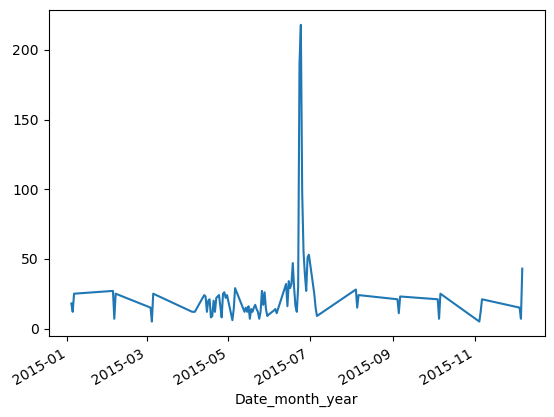

In [12]:
df["Date_month_year"].value_counts().plot();

In [13]:
f = df.groupby(pd.Grouper(freq="M")).size()

In [14]:
f.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

<Axes: xlabel='date_index'>

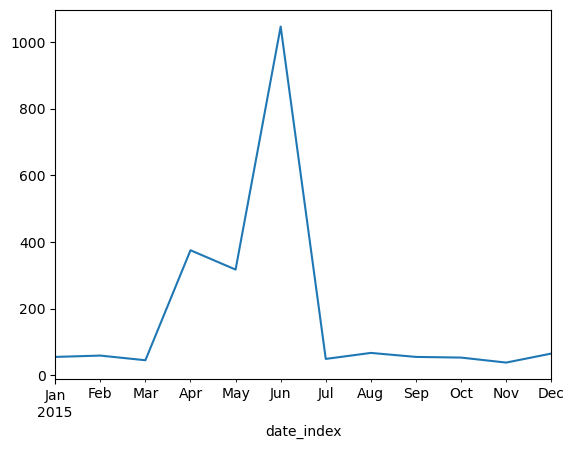

In [15]:
df.groupby(pd.Grouper(freq="M")).size().plot()

In [16]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [17]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [18]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [19]:

df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:10]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [20]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
print(Status_complaints)

newStatus             Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   0.0
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   0.0
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   0.0
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   0.0
Nevada                   1.0   0.0
New Hampshire       

<Axes: ylabel='State'>

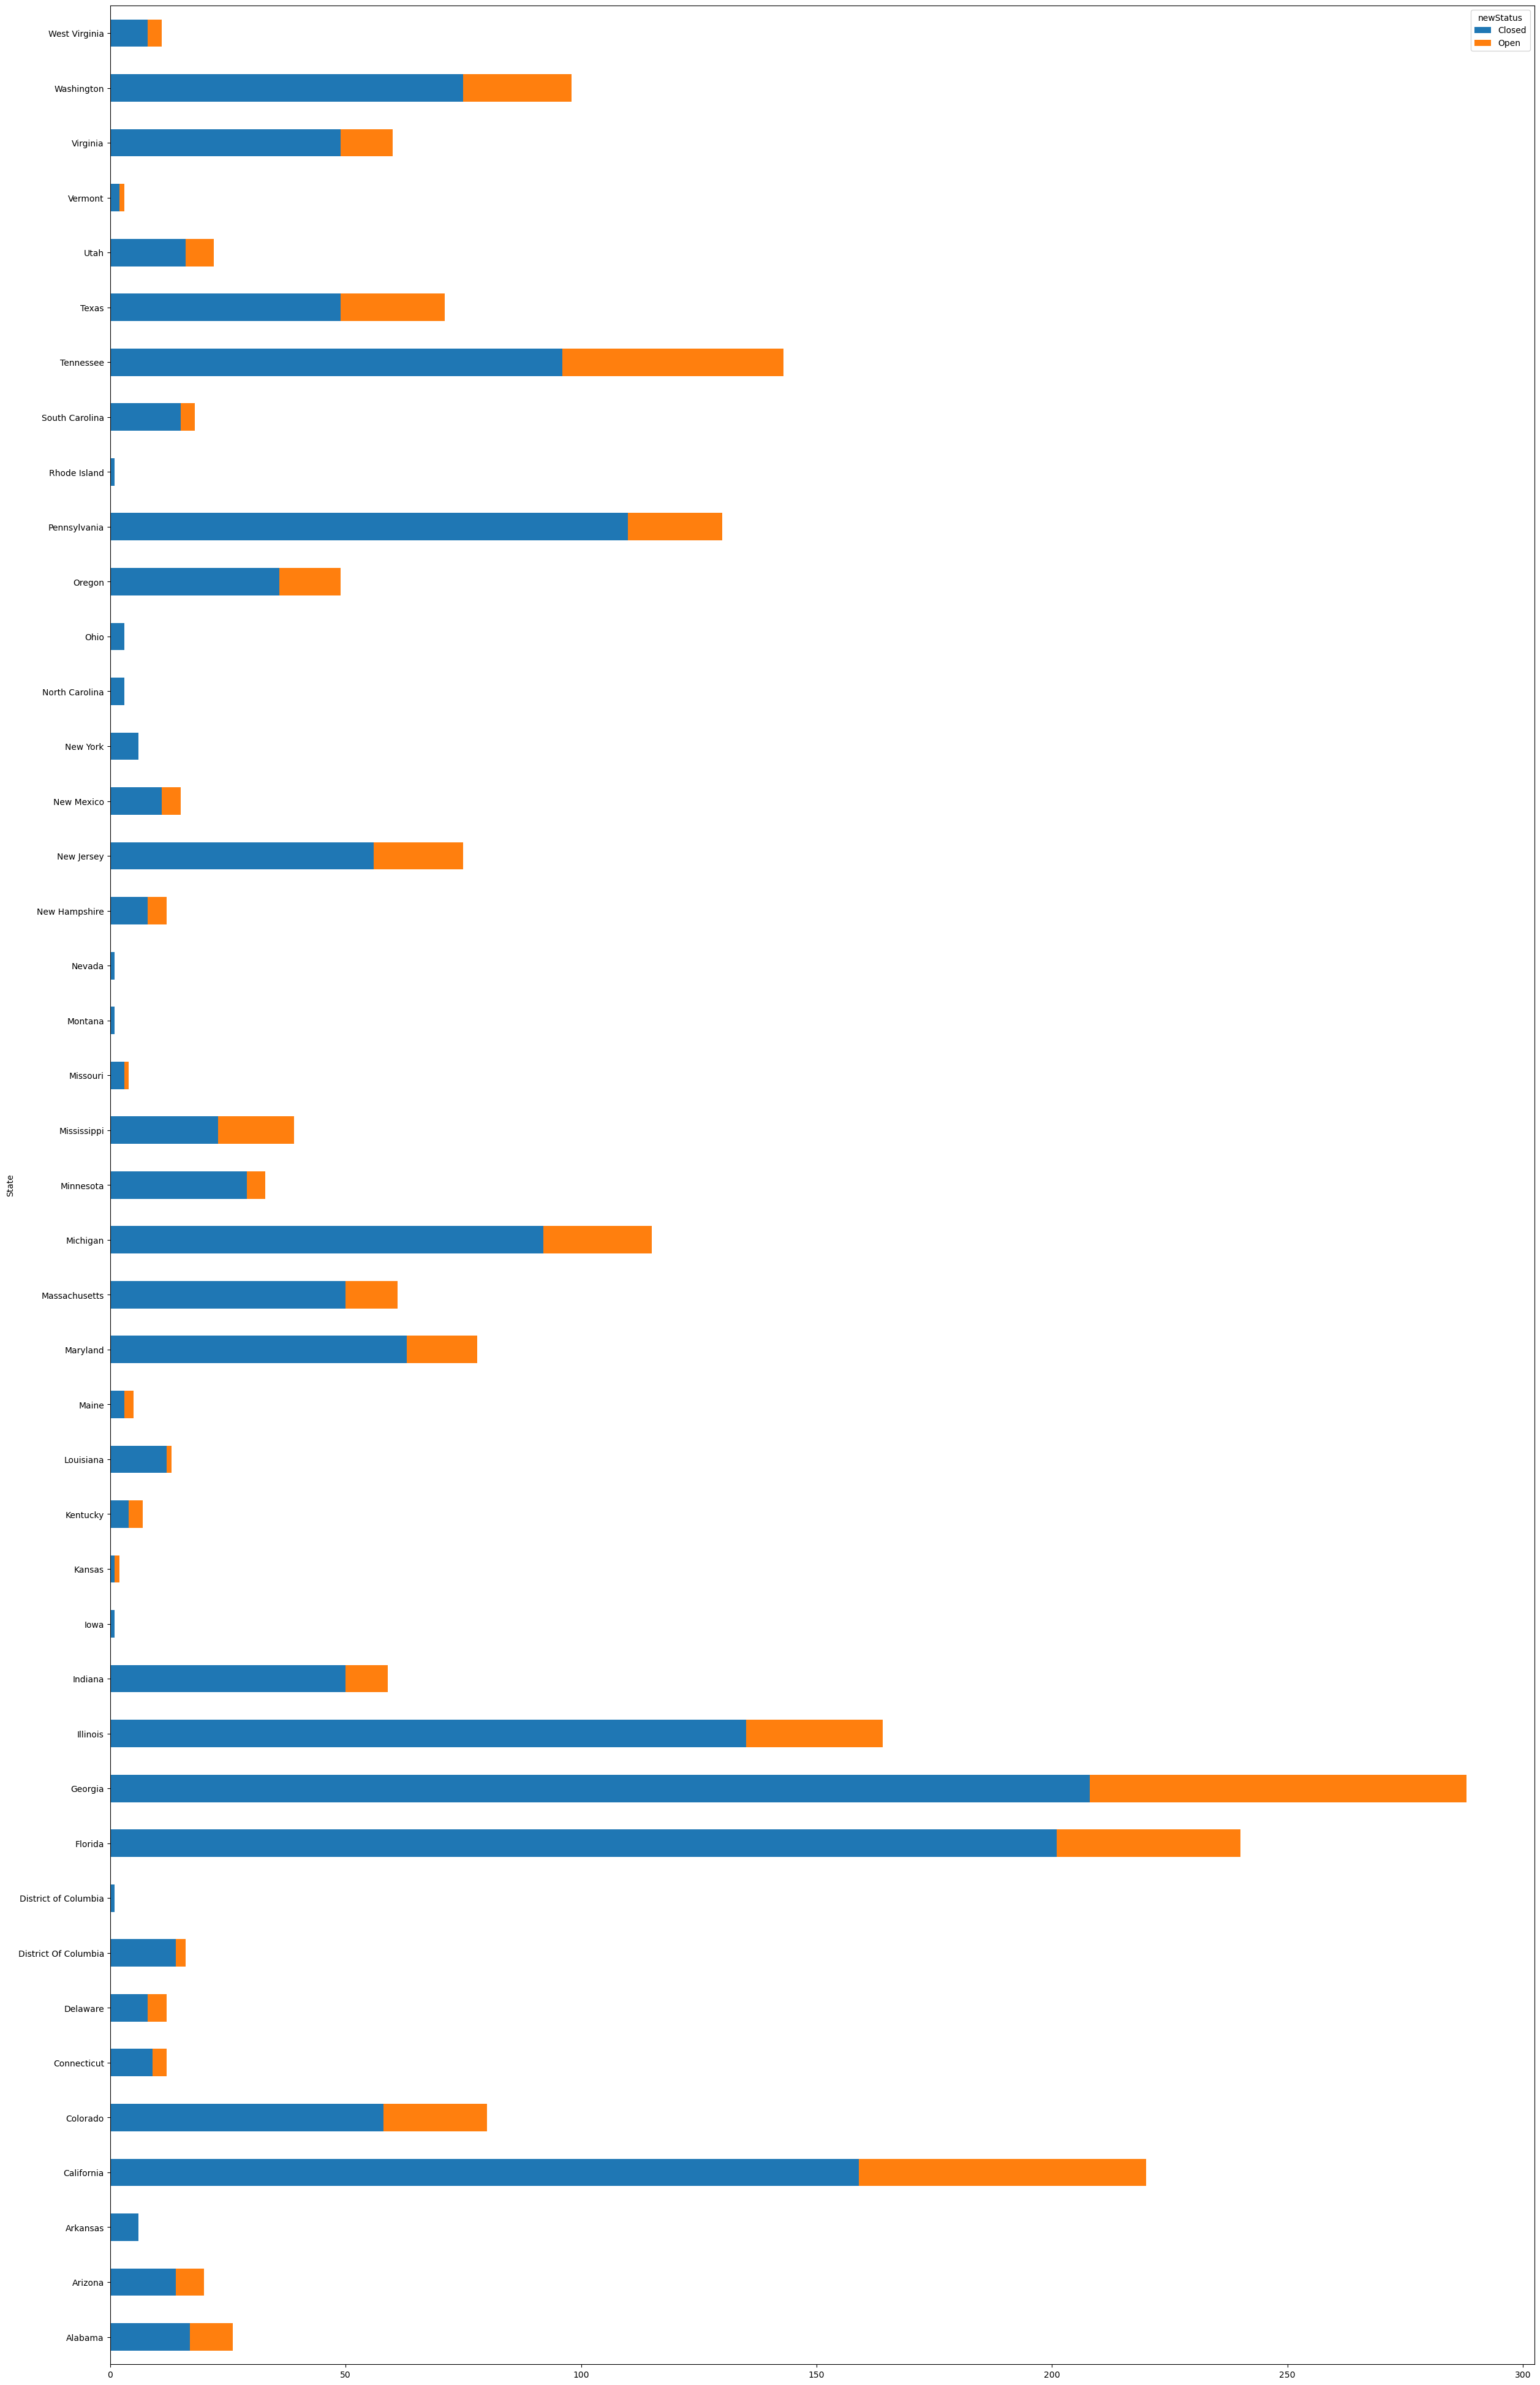

In [21]:
Status_complaints.plot(kind='barh', figsize=(30,50), stacked=True)

In [22]:
df.groupby(["State"]).size().sort_values(ascending = False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [23]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [24]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [25]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [26]:
doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [27]:
import gensim
from gensim import corpora

In [28]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary<1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...>


In [29]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [30]:
from gensim.models import LdaModel

In [31]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [32]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.056*"comcast" + 0.043*"fee" + 0.035*"service" + 0.032*"paying" + 0.028*"bill" + 0.025*"without" + 0.024*"month" + 0.023*"refund" + 0.019*"back" + 0.019*"year"')

(1, '0.217*"billing" + 0.150*"comcast" + 0.060*"practice" + 0.057*"charge" + 0.051*"unfair" + 0.038*"pricing" + 0.018*"fraudulent" + 0.018*"service" + 0.016*"monopolistic" + 0.016*"charged"')

(2, '0.173*"service" + 0.090*"comcast" + 0.063*"customer" + 0.039*"bill" + 0.035*"poor" + 0.021*"terrible" + 0.016*"help" + 0.014*"cramming" + 0.014*"get" + 0.014*"incorrect"')

(3, '0.184*"data" + 0.149*"cap" + 0.148*"comcast" + 0.035*"usage" + 0.033*"internet" + 0.028*"xfinity" + 0.021*"charge" + 0.016*"overage" + 0.015*"limit" + 0.013*"modem"')

(4, '0.151*"issue" + 0.077*"comcast" + 0.038*"false" + 0.030*"monopoly" + 0.029*"switch" + 0.026*"deceptive" + 0.022*"advertising" + 0.022*"payment" + 0.020*"bait" + 0.020*"email"')

(5, '0.158*"internet" + 0.147*"comcast" + 0.110*"service" + 0.030*"price" + 0.021*"cable" + 0.018*"probl

In [33]:

word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [34]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,comcast,billing,service,data,issue,internet,internet,comcast,complaint
1,fee,comcast,comcast,cap,comcast,comcast,speed,service,comcast
2,service,practice,customer,comcast,false,service,comcast,outage,service
3,paying,charge,bill,usage,monopoly,price,slow,promised,comcastxfinity
4,bill,unfair,poor,internet,switch,cable,throttling,without,intermittent
5,without,pricing,terrible,xfinity,deceptive,problem,billed,bandwidth,day
6,month,fraudulent,help,charge,advertising,connection,low,installation,lack
7,refund,service,cramming,overage,payment,high,advertised,failure,connectivity
8,back,monopolistic,get,limit,bait,show,connectivity,rate,regarding
9,year,charged,incorrect,modem,email,charging,extremely,provide,week


In [38]:
# Unresolved complaints distribution across State
df_unresolved = df[df['newStatus']=='Open']
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_unresolved = df_unresolved['State'].value_counts()
df_unresolved.head(25)

State
Georgia          80
California       61
Tennessee        47
Florida          39
Illinois         29
Michigan         23
Washington       23
Texas            22
Colorado         22
Pennsylvania     20
New Jersey       19
Mississippi      16
Maryland         15
Oregon           13
Massachusetts    11
Virginia         11
Indiana           9
Alabama           9
Arizona           6
Utah              6
New Hampshire     4
Delaware          4
Minnesota         4
New Mexico        4
Connecticut       3
Name: count, dtype: int64

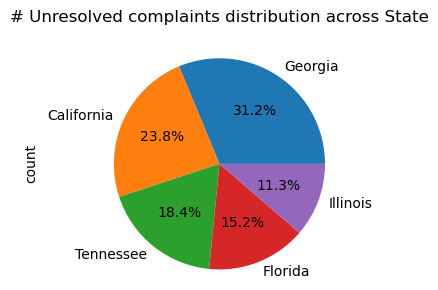

In [39]:
df_unresolved.head().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('# Unresolved complaints distribution across State\n')
plt.tight_layout()
plt.show()

Georgia has maximum percentage of unresolved complaints
Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [40]:
df_received = df[df['Received Via'].isin(['Internet','Customer Care Call'])]

In [41]:
df_received.newStatus.value_counts()

newStatus
Closed    1707
Open       517
Name: count, dtype: int64

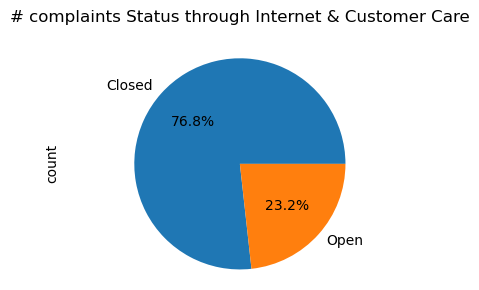

In [42]:

df_received.newStatus.value_counts().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('# complaints Status through Internet & Customer Care\n')
plt.tight_layout()
plt.show()

In [44]:
df_received_closed = df_received[df_received['newStatus']=='Closed']

In [45]:

df_received_closed.newStatus.value_counts()

newStatus
Closed    1707
Name: count, dtype: int64